# Lab 08 - Logistic Regression Lab Enhancement

## Introduction

## Data Preprocessing

The dataset provides insights into customer satisfaction levels within an undisclosed airline company. While the specific airline name is withheld, the dataset is rich in information, containing 22 columns and 129,880 rows. It aims to predict whether future customers will be satisfied based on various parameters included in the dataset.

The columns likely cover a range of factors that influence customer satisfaction, such as flight punctuality, service quality, and so. By analyzing this dataset, airlines can gain valuable insights into the factors that contribute to customer satisfaction and tailor their services accordingly to enhance the overall customer experience.

Source: https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Airline_customer_satisfaction.csv')

# Drop rows with missing values if any
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)  # Binary encoding for logistic regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.8294076762684377
Confusion Matrix:
[[ 9590  2231]
 [ 2187 11890]]
Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.81      0.81     11821
          1       0.84      0.84      0.84     14077

avg / total       0.83      0.83      0.83     25898



## Feature Importance Analysis

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importance = model.coef_[0]

# Plot feature importance
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


<Figure size 1200x600 with 1 Axes>

## Advanced Visualization

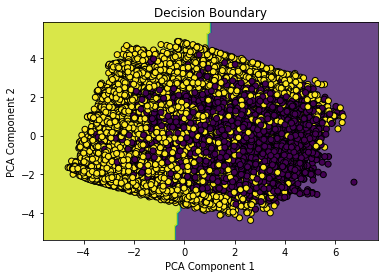

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Train a new model on the reduced data
model_2d = LogisticRegression(solver='liblinear', random_state=42)
model_2d.fit(X_train_2d, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_train_2d, y_train, model_2d)


## Model Comparison And Discussion

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy}")

# Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
print(f"Random Forest Accuracy: {forest_accuracy}")


Decision Tree Accuracy: 0.9350915128581357
Random Forest Accuracy: 0.9504981079620047


## Conclusion